<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [48]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


In [31]:

boston_df['CHAS_bool'] = boston_df['CHAS'].astype(bool)
print(boston_df.info())
print(boston_df.describe())
print(boston_df['CHAS_bool'].info())

scipy.stats.levene(boston_df[boston_df['CHAS_bool'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS_bool'] == 0]['MEDV'], center='mean')



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
 14  CHAS_boon   506 non-null    bool   
 15  CHAS_bool   506 non-null    bool   
dtypes: bool(2), float64(13), int64(1)
memory usage: 56.4 KB
None
       Unnamed: 0        CRIM          ZN       INDUS        CHAS         NOX  \
count  506

LeveneResult(statistic=8.75190489604598, pvalue=0.003238119367639829)

In [95]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV,CHAS_boon,CHAS_bool,AGE_group,age_group,AGE.group,AGE_groups
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0,False,False,Middle-aged (35-70),NaN,NaN,between 35 and 70 years
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6,False,False,Old (≥70),NaN,NaN,70 years and older
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7,False,False,Middle-aged (35-70),NaN,NaN,between 35 and 70 years
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4,False,False,Middle-aged (35-70),NaN,NaN,between 35 and 70 years
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2,False,False,Middle-aged (35-70),NaN,NaN,between 35 and 70 years



*   $H\_0:$ There is no significant difference in the median value of houses bounded by the Charles river
*   $H\_1:$ There is a significant difference in the median value of houses bounded by the Charles river


In [43]:
scipy.stats.ttest_ind(boston_df[boston_df['CHAS'] == 1]['MEDV'],
                   boston_df[boston_df['CHAS'] == 0]['MEDV'], equal_var = False )

TtestResult(statistic=3.113291312794837, pvalue=0.003567170098137517, df=36.876408797611994)

## $Since P is less than 0.05 we reject the null hypothesis that there is no signifcant relationship between CHAS & MEDV$
### See Charts below


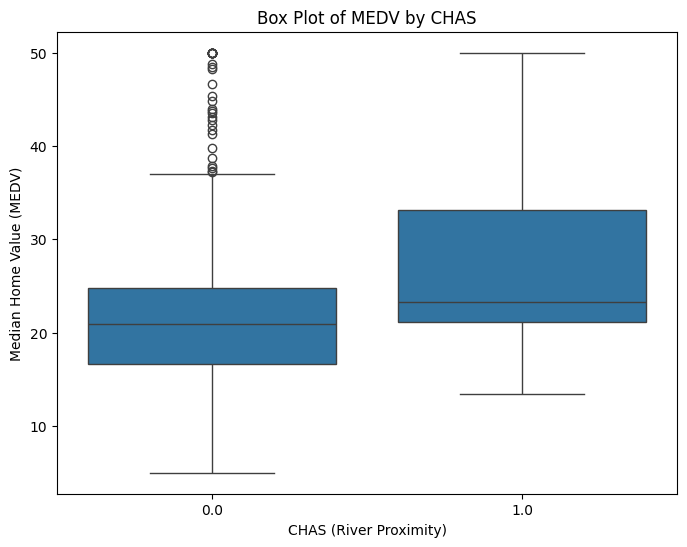

In [66]:
pyplot.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['CHAS'], y=boston_df['MEDV'])


pyplot.xlabel('CHAS (River Proximity)')
pyplot.ylabel('Median Home Value (MEDV)')
pyplot.title('Box Plot of MEDV by CHAS')


pyplot.show()

<ipython-input-67-3083d5487870>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=boston_df['CHAS'], y=boston_df['MEDV'], estimator=sum, ci=None)


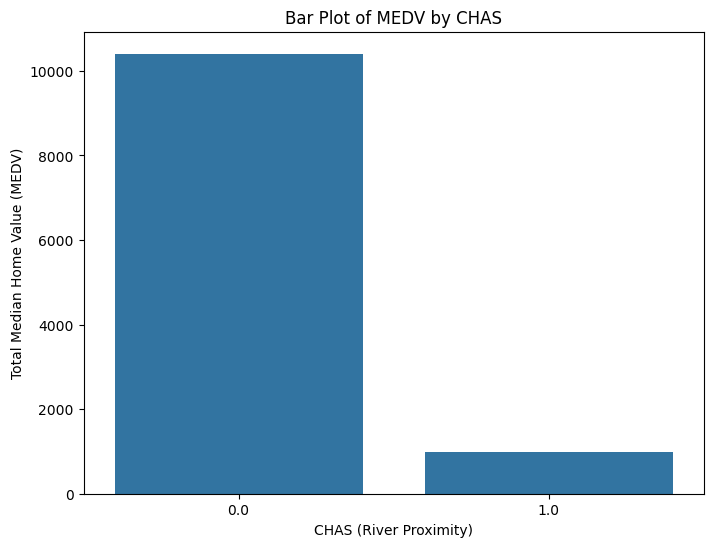

In [67]:

pyplot.figure(figsize=(8, 6))
sns.barplot(x=boston_df['CHAS'], y=boston_df['MEDV'], estimator=sum, ci=None)


pyplot.xlabel('CHAS (River Proximity)')
pyplot.ylabel('Total Median Home Value (MEDV)')
pyplot.title('Bar Plot of MEDV by CHAS')

pyplot.show()


*   $H\_0:$ There is no difference between these three age groups and Median Home Value
*   $H\_1:$ There is a difference between these three age groups and Median Home Value

In [88]:
boston_df.loc[(boston_df['AGE'] <= 35), 'AGE_groups'] = '35 years and younger'
boston_df.loc[(boston_df['AGE'] > 35) & (boston_df['AGE'] < 70), 'AGE_groups'] = 'between 35 and 70 years'
boston_df.loc[(boston_df['AGE'] >= 70), 'AGE_groups'] = '70 years and older'

lower = boston_df[boston_df['AGE_groups'] == '35 years and younger']['MEDV']
middle = boston_df[boston_df['AGE_groups'] == 'between 35 and 70 years']['MEDV']
high = boston_df[boston_df['AGE_groups'] == '70 years and older']['MEDV']

In [90]:
f_statistic, p_value = scipy.stats.f_oneway(lower, middle, high)
print("F_Statistic: {0}, P-Value: {1}".format(f_statistic,p_value))

F_Statistic: 36.40764999196599, P-Value: 1.7105011022702984e-15


## **Since P is less than 0.05 we reject the null hypothesis that there is no difference between these three age groups and Median Home Value**
### See Charts below


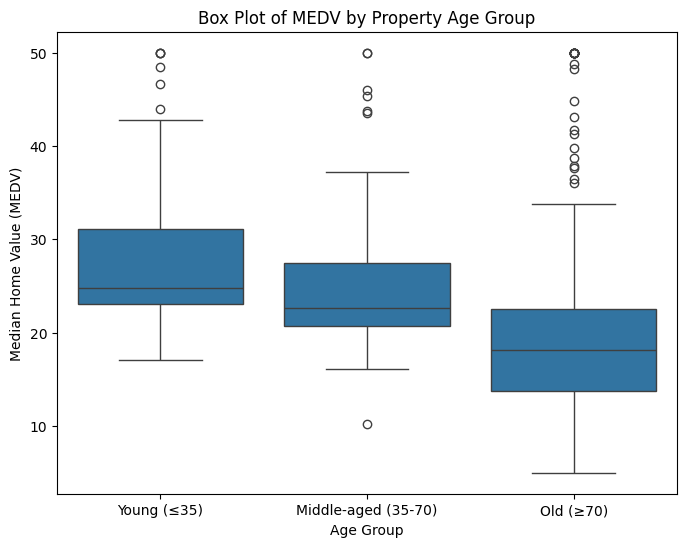

In [65]:


boston_df['AGE_group'] = pd.cut(
    boston_df['AGE'],
    bins=[0, 35, 70, 100],  # Define bin edges
    labels=['Young (≤35)', 'Middle-aged (35-70)', 'Old (≥70)']  # Assign labels
)

pyplot.figure(figsize=(8, 6))
sns.boxplot(x=boston_df['AGE_group'], y=boston_df['MEDV'])


pyplot.xlabel('Age Group')
pyplot.ylabel('Median Home Value (MEDV)')
pyplot.title('Box Plot of MEDV by Property Age Group')


pyplot.show()


*   $H\_0:$ There is no significant relationshipNOX and INDUS
*   $H\_1:$ There is a significant relationshipNOX and INDUS


In [91]:
scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

PearsonRResult(statistic=0.7636514469209192, pvalue=7.913361061210442e-98)

## **p < 0.05. therfore there is evidence that there is a correlation between Nitric Oxide Concentrations (NOX) and Proportion of Non-Retail Business Acres (INDUS)**
### See Charts below


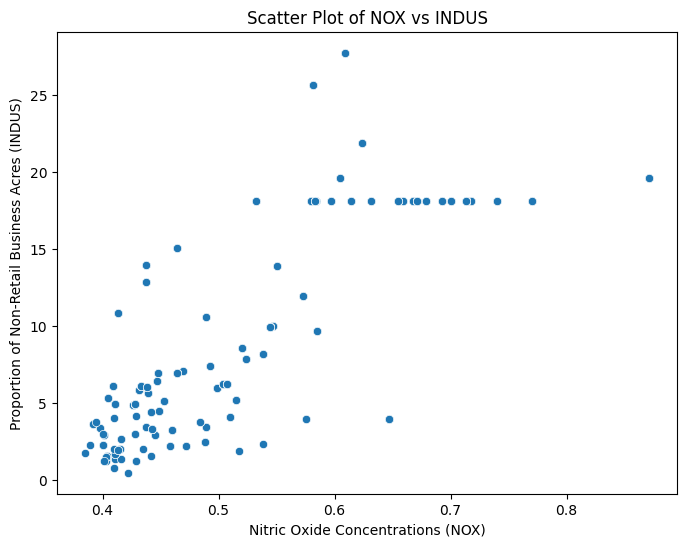

In [79]:
pyplot.figure(figsize=(8, 6))
sns.scatterplot(x=boston_df['NOX'], y=boston_df['INDUS'])


pyplot.xlabel('Nitric Oxide Concentrations (NOX)')
pyplot.ylabel('Proportion of Non-Retail Business Acres (INDUS)')
pyplot.title('Scatter Plot of NOX vs INDUS')

pyplot.show()

<ipython-input-86-411ee480ab96>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  x = sns.distplot(boston_df['PTRATIO'],


[Text(0.5, 0, 'Normal Distribution'), Text(0, 0.5, 'Frequency')]

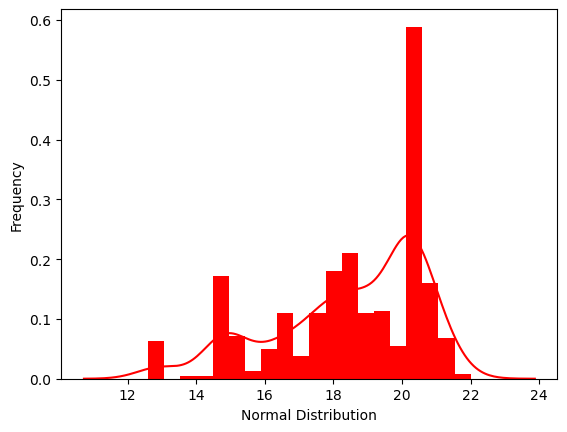

In [86]:
x = sns.distplot(boston_df['PTRATIO'],
                  bins=20,
                  kde=True,
                  color='red',
                  hist_kws={"linewidth": 15,'alpha':1})
x.set(xlabel='Normal Distribution', ylabel='Frequency')

In [87]:
print('This distrubution appears to skewing to the right')

This distrubution appears to skewing to the right


In [96]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 

model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Mon, 12 May 2025   Prob (F-statistic):           1.21e-08
Time:                        23:45:09   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [115]:
sqpr_rt = np.sqrt(0.062)

print("Correlation coefficient of ", sqpr_rt , 'meaning that the father the distance the higher the value')

Correlation coefficient of  0.24899799195977465 meaning that the father the distance the higher the value


## **With a positive Correlation Coefficient that would mean the farther the distance the higher the value and with a p<0.05 the relationship is significant**
### See 'extra credit' Charts below


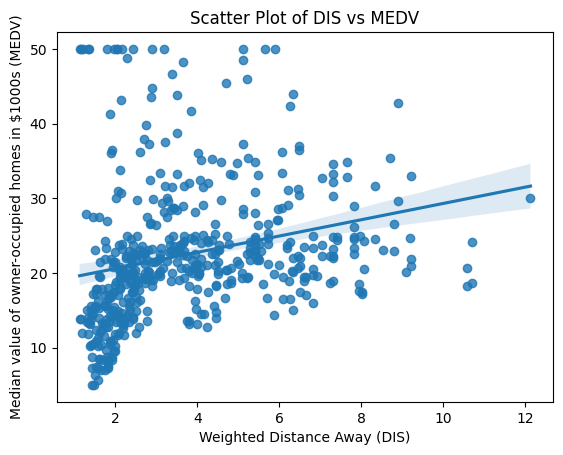

In [113]:
sns.regplot(x=boston_df['DIS'], y=boston_df['MEDV'], scatter=True)

pyplot.xlabel('Weighted Distance Away (DIS)')
pyplot.ylabel('Median value of owner-occupied homes in $1000s (MEDV)')
pyplot.title('Scatter Plot of DIS vs MEDV')

pyplot.show()